# Naive Bayes Implementation - Classification 

In [41]:
import sklearn as sk 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
y = iris.target

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
df.loc[1:5, "petal width (cm)"]

1    0.2
2    0.2
3    0.2
4    0.2
5    0.4
Name: petal width (cm), dtype: float64

In [60]:
def split_data(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

    
test, train = split_data(df, 0.1)
train.loc[,]

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64

In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.impute import SimpleImputer

# numerical 
numerical_features = ['sepal length (cm)' , 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
categorical_features = ['target']

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('norm', Normalizer())                   
])

# Pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant')),  
    # ('onehot', OneHotEncoder(handle_unknown='ignore'))                   
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

# Apply the preprocessor to the training data
train_transformed = preprocessor.fit_transform(train)

# Combine all feature names
all_feature_names = list(numerical_features) + list(categorical_features)

# Convert to DataFrame
train_transformed = preprocessor.fit_transform(train)
test_transformed = preprocessor.fit_transform(test)
test_transformed_df = pd.DataFrame(data=train_transformed, columns=['sepal length (cm)' , 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'flower'])
train_transformed_df = pd.DataFrame(data=train_transformed, columns=['sepal length (cm)' , 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'flower'])
train_transformed_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,0.726348,0.380468,0.541879,0.184469,1.0
1,0.686190,0.316703,0.612293,0.232249,2.0
2,0.761852,0.340112,0.530575,0.149649,1.0
3,0.722330,0.354829,0.570260,0.164742,1.0
4,0.694177,0.303703,0.607405,0.238624,2.0
...,...,...,...,...,...
130,0.770119,0.353497,0.504996,0.164124,1.0
131,0.670541,0.342113,0.615803,0.232637,2.0
132,0.811209,0.559454,0.167836,0.027973,0.0
133,0.762630,0.341869,0.525952,0.157786,1.0


In [120]:
# Correlation matrix
corr_matrix = train_transformed_df.corr()
for cols in train_transformed_df.columns:
    print(f"{cols}")
    print(f"{corr_matrix[cols].sort_values(ascending=True)}\n")

# SL + PW/PL -0.9
# PL + PW -94.0

# Classify Setosa petal length (cm)   -0.977093 and sepal width (cm) 0.957117
# Virginica sepal length (cm)   -0.755379

sepal length (cm)
petal width (cm)    -0.900323
flower              -0.889921
petal length (cm)   -0.863026
sepal width (cm)     0.732536
sepal length (cm)    1.000000
Name: sepal length (cm), dtype: float64

sepal width (cm)
petal length (cm)   -0.966415
petal width (cm)    -0.898817
flower              -0.890076
sepal length (cm)    0.732536
sepal width (cm)     1.000000
Name: sepal width (cm), dtype: float64

petal length (cm)
sepal width (cm)    -0.966415
sepal length (cm)   -0.863026
flower               0.921635
petal width (cm)     0.949307
petal length (cm)    1.000000
Name: petal length (cm), dtype: float64

petal width (cm)
sepal length (cm)   -0.900323
sepal width (cm)    -0.898817
flower               0.933953
petal length (cm)    0.949307
petal width (cm)     1.000000
Name: petal width (cm), dtype: float64

flower
sepal width (cm)    -0.890076
sepal length (cm)   -0.889921
petal length (cm)    0.921635
petal width (cm)     0.933953
flower               1.000000
Name: flowe

<Figure size 640x480 with 0 Axes>

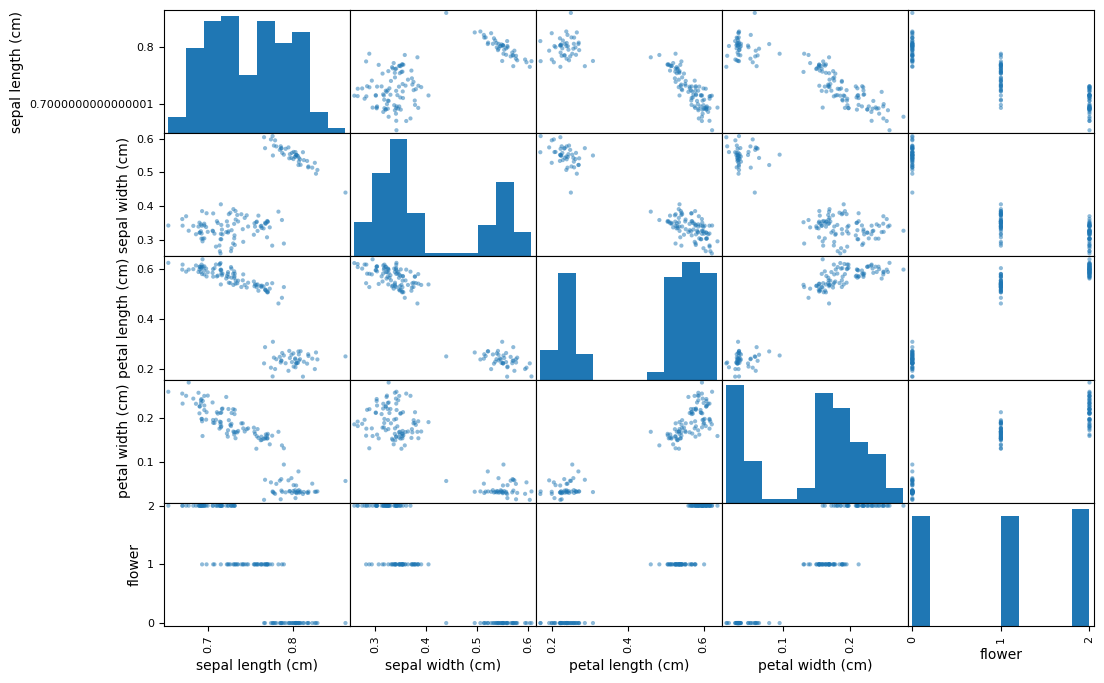

In [121]:
from pandas.plotting import scatter_matrix

plt.figure()
scatter_matrix(train_transformed_df, figsize=(12,8))
plt.show()

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# training model 
X_train = train_transformed_df.loc[:,['sepal length (cm)' , 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y_train = train_transformed_df.loc[:, 'flower']
X_test = test_transformed_df.loc[:,['sepal length (cm)' , 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
Y_test = train_transformed_df.loc[:, 'flower']
# Multiclass classification using Naive Bayes
gnb = GaussianNB()
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)
# accuracy 
accuracy_score(Y_pred,Y_test)

0.9777777777777777